In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
%matplotlib notebook

In [2]:
#################################################################
######  FUNCTION THAT UPDATES SIMULATION ONE TIMESTEP
#################################################################

def update(i,ANIMATE):
    global plankton, num_fish, fish_i_loc, fish_j_loc, fish_energy, fish_pop_size_over_time, plankton_pop_size_over_time
    

    #grow plankton, using logistic growth
    plankton = plankton + plankton_growth_rate*plankton*(1-plankton/plankton_carrying_cap)
   
    
    #diffuse plankton

    #move fish randomly
#     i_steps = np.random.choice([-1,0,1],size=num_fish)
#     j_steps = np.random.choice([-1,0,1],size=num_fish)
#     fish_i_loc = (fish_i_loc + i_steps) % L
#     fish_j_loc = (fish_j_loc + j_steps) % L
    
    #move fish to the spot with the most plankton
    neighborhood_indices = [-1,0,1]
    
    for fish in range(num_fish):
        plankton_high = 0
        neighbor_i_high = (fish_i_loc[fish])
        neighbor_j_high = (fish_j_loc[fish])
        for neighbor_index_i in neighborhood_indices:
            for neighbor_index_j in neighborhood_indices:
                neighbor_i = (fish_i_loc[fish] + neighbor_index_i)%L
                neighbor_j = (fish_j_loc[fish] + neighbor_index_j)%L
                
                if plankton[neighbor_i,neighbor_j] > plankton_high:
                    plankton_high = plankton[neighbor_i,neighbor_j]
                    neighbor_i_high = neighbor_i
                    neighbor_j_high = neighbor_j
        fish_i_loc[fish] = neighbor_i_high
        fish_j_loc[fish] = neighbor_j_high
                    
            
        
    # fish spend energy moving
    fish_energy -= fish_energy_expend_rate
    
    # fish eat plankton
    for fish in range(num_fish): #loop over each fish
        #figure out how much food it will eat
        plankton_eaten = fish_forage_fraction*plankton[fish_i_loc[fish],fish_j_loc[fish]] 
        #remove food from patch
        plankton[fish_i_loc[fish],fish_j_loc[fish]] -= plankton_eaten
        #give that food to fish
        fish_energy[fish] += plankton_eaten
        
    # fish reproduce
    for fish in range(num_fish):    #loop over fish
        if( np.random.rand()<fish_prob_2_breed and fish_energy[fish]>fish_min_breeding_energy ): #randomly choose if a fish makes offspring
            #add offspring to EACH trait list
            fish_i_loc = np.append(fish_i_loc,fish_i_loc[fish])
            fish_j_loc = np.append(fish_j_loc,fish_j_loc[fish])
            fish_energy = np.append(fish_energy,fish_intial_energy)
            #update parent's energy
            fish_energy[fish] -= fish_intial_energy
            #update number of fish!
            num_fish += 1
            
    # fish die due to starvation
    fish_with_enough_energy = fish_energy > 0    #see who has less than zero engery
    # remove them from EACH list
    fish_i_loc = fish_i_loc[fish_with_enough_energy]
    fish_j_loc = fish_j_loc[fish_with_enough_energy]
    fish_energy = fish_energy[fish_with_enough_energy]
    num_fish = len(fish_i_loc) #update the number of fish!!!
    
    # record state variables
    fish_pop_size_over_time[i] = num_fish
    plankton_pop_size_over_time[i] = np.sum(plankton)
    
    if ANIMATE:
        imshow.set_data(plankton.transpose())
        scatter.set_offsets(np.hstack((fish_i_loc[:, np.newaxis],fish_j_loc[:, np.newaxis])))

In [3]:
#################################################################
###### 
######  INITIALIZE A NEW SIMULATION
######  
#################################################################

#################################################################
######  PARAMETERS
#################################################################

#----------------------------------------------------------
# General
max_time = 2000 #length of simulation
L = 32 # length of 2D world


#----------------------------------------------------------
# Fish
num_fish = 10 # the number of agents
fish_prob_2_breed = 0.02 # probability that an agent reproduces each time step
fish_forage_fraction = 0.3 #fraction of plankton a fish eats per time step
fish_intial_energy = 20.0
fish_min_breeding_energy = 2*fish_intial_energy #minimum energy reserves required for breeding
fish_energy_expend_rate = 1.0
fish_move_prob = 0.8

#----------------------------------------------------------
# Plankton
plankton_carrying_cap = 10.0
plankton_growth_rate = 0.2
plankton_diffusion_rate = 0.1


#################################################################
######  SET UP
#################################################################

#----------------------------------------------------------
# Fish
fish_i_loc = np.random.randint(0,L, num_fish)
fish_j_loc = np.random.randint(0,L, num_fish)
fish_energy = np.full(num_fish,fish_intial_energy)

#----------------------------------------------------------
# Plankton
plankton = np.full((L,L),plankton_carrying_cap/2)


#----------------------------------------------------------
# Data
fish_pop_size_over_time = np.zeros(max_time)
plankton_pop_size_over_time = np.zeros(max_time)

<IPython.core.display.Javascript object>


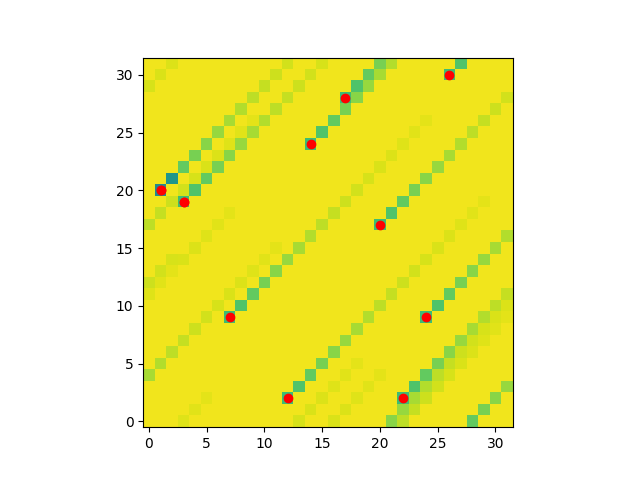

In [4]:
#######################################
### Show an animation of the simulation
#######################################


fig, ax = plt.subplots() #set up a figure
plt.grid(False) # get rid of grid lines
imshow = ax.imshow(plankton) #plot the resource (plankton) field
imshow.set_clim(vmin=0, vmax=plankton_carrying_cap) #set the scale of the colour map
scatter = ax.scatter(fish_i_loc,fish_j_loc, c='red') #plot the agents (fish) as circles
ax.set_xlim(-0.5,L-0.5) #set the limits of the figure
ax.set_ylim(-0.5,L-0.5)

ani = animation.FuncAnimation(fig, update, frames=max_time, fargs=(True,), interval=200)
#fig.show()
plt.show()

<IPython.core.display.Javascript object>


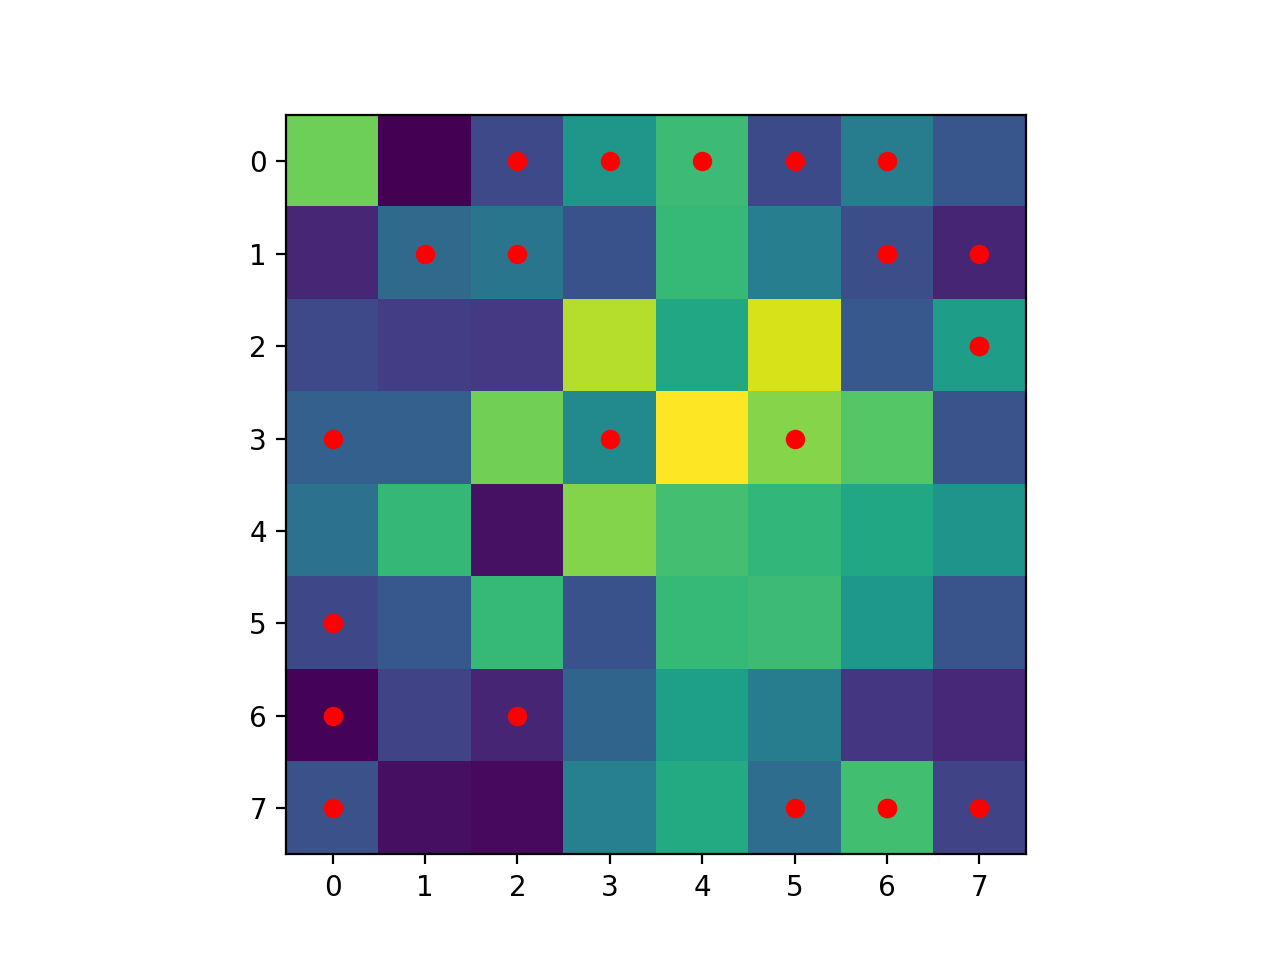

<IPython.core.display.Javascript object>


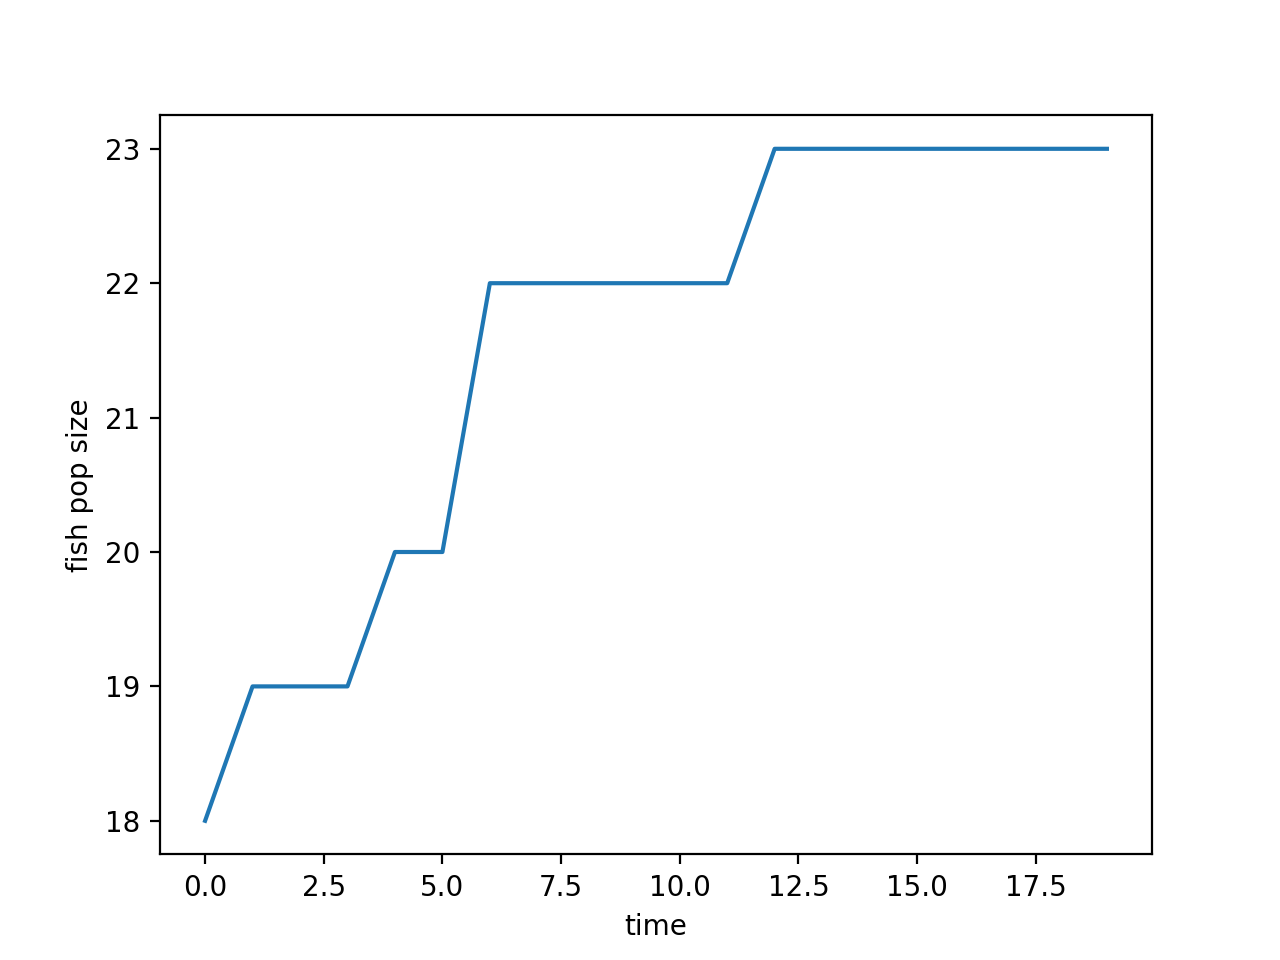

<IPython.core.display.Javascript object>


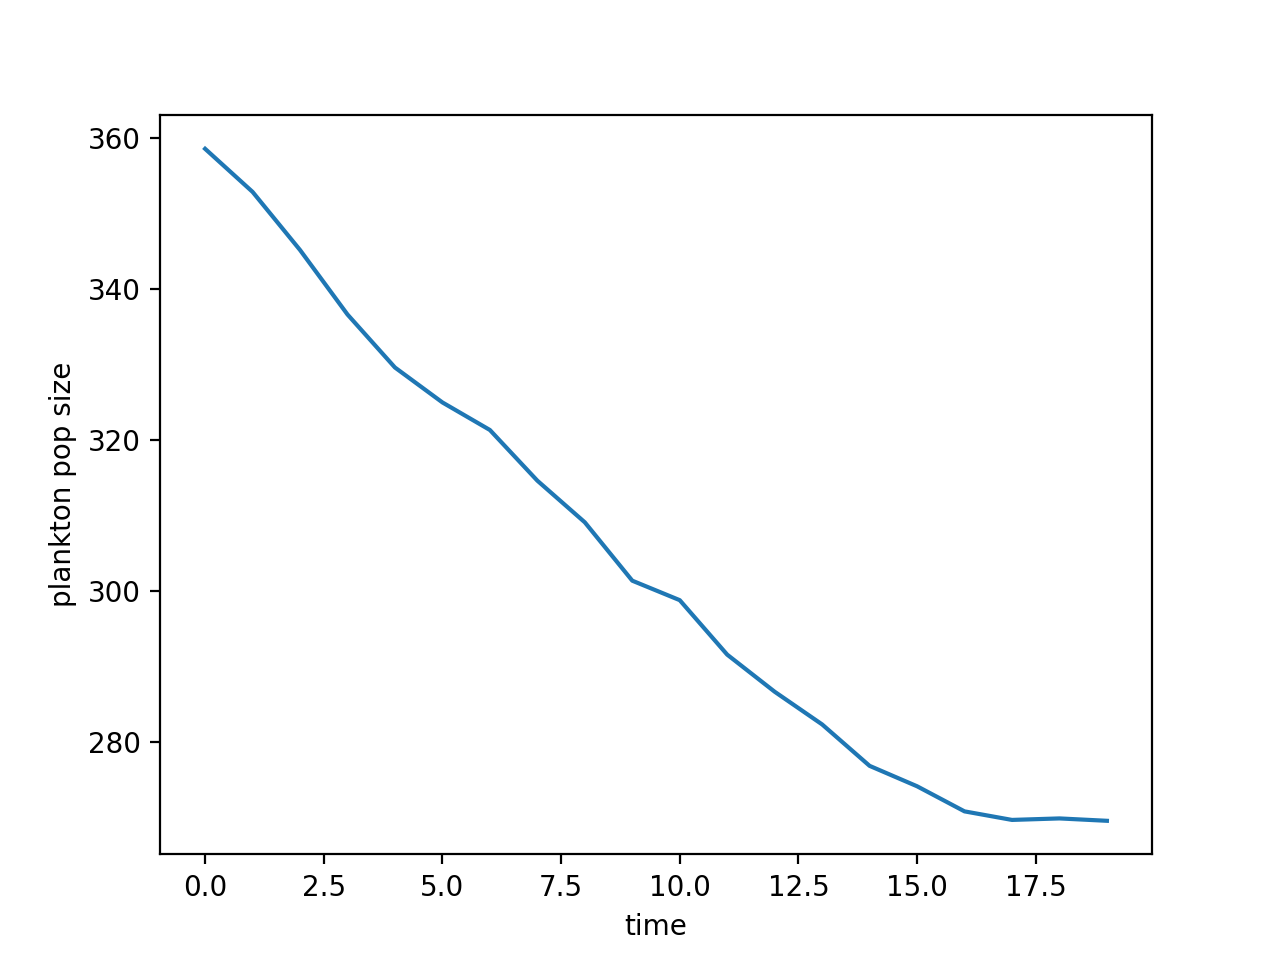

<IPython.core.display.Javascript object>


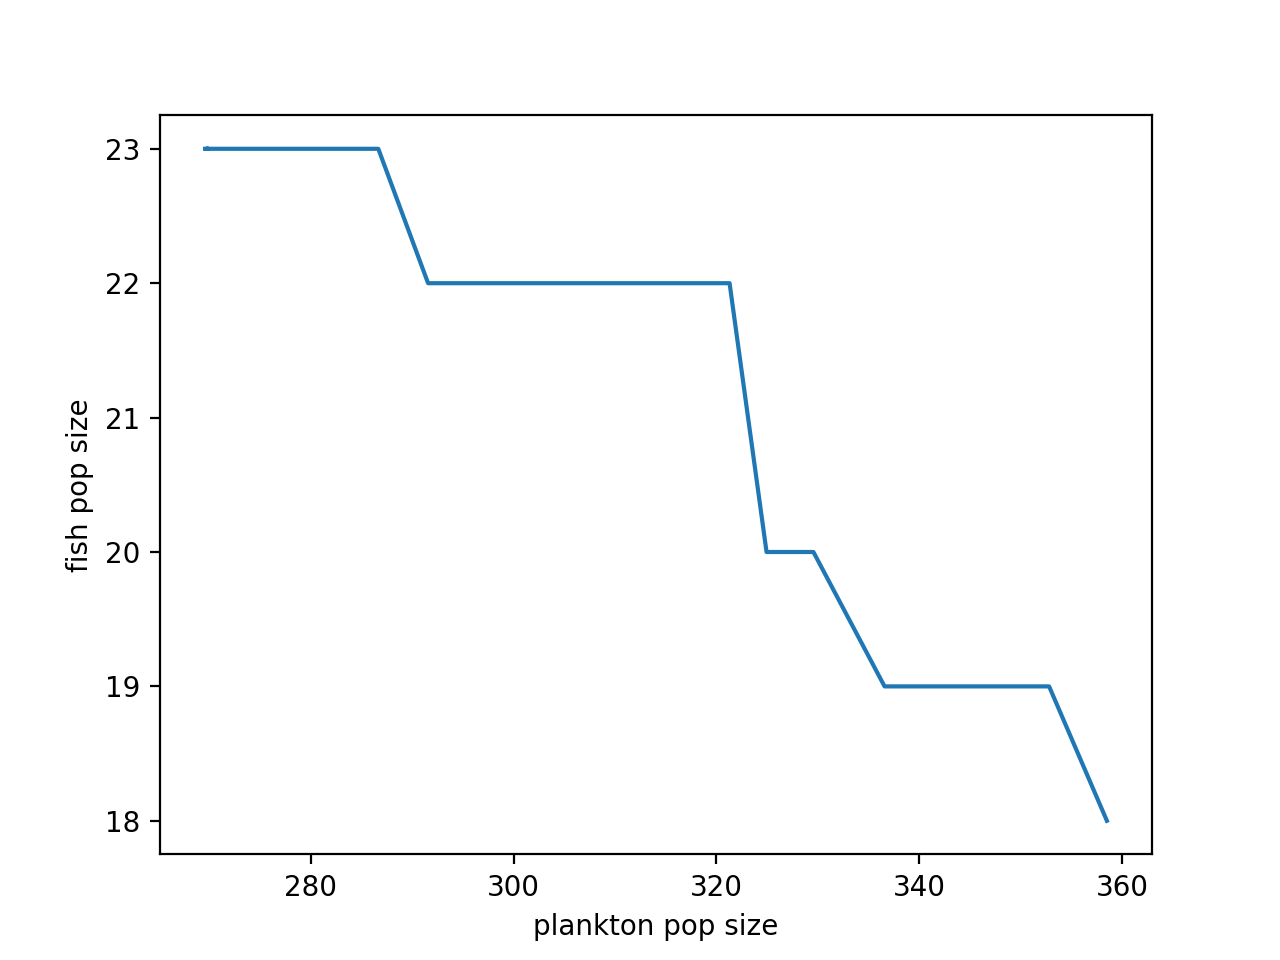

Text(0, 0.5, 'fish pop size')

In [35]:
#######################################
### Run the simulation without animation
#######################################

for i in range(max_time):
    update(i,False)
    
plt.figure()
plt.imshow(plankton)
plt.scatter(fish_i_loc,fish_j_loc, c='red',vmin=0, vmax=plankton_carrying_cap)

plt.figure()
plt.plot(fish_pop_size_over_time)
plt.xlabel('time')
plt.ylabel('fish pop size')

plt.figure()
plt.plot(plankton_pop_size_over_time)
plt.xlabel('time')
plt.ylabel('plankton pop size')

plt.figure()
plt.plot(plankton_pop_size_over_time,fish_pop_size_over_time)
plt.xlabel('plankton pop size')
plt.ylabel('fish pop size')

In [17]:
qq = 5
qq -= 1
print(qq)

4


In [27]:
np.random.rand()

0.6680960490062801

In [36]:
qq = np.random.rand(10)
print(qq)
high_mask = qq > 0.5
print(high_mask)
ww = qq[~high_mask]

[0.44743513 0.72995676 0.80138263 0.13010251 0.77077179 0.74327884
 0.66165841 0.99971931 0.91668376 0.16077848]
[False  True  True False  True  True  True  True  True False]


In [38]:
len(qq)
len(ww)

3

In [33]:
#################################################################
######  PARAMETERS
#################################################################

#----------------------------------------------------------
# General
max_time = 20 #length of simulation
L = 8 # length of 2D world


#----------------------------------------------------------
# Fish
num_fish = 10 # the number of agents
fish_prob_2_breed = 0.02 # probability that an agent reproduces each time step
fish_forage_fraction = 0.3 #fraction of plankton a fish eats per time step
fish_intial_energy = 20.0
fish_min_breeding_energy = 2*fish_intial_energy #minimum energy reserves required for breeding
fish_energy_expend_rate = 1.0
fish_move_prob = 0.8

#----------------------------------------------------------
# Plankton
plankton_carrying_cap = 10.0
plankton_growth_rate = 0.2
plankton_diffusion_rate = 0.1

#################################################################
######  SET UP
#################################################################

#----------------------------------------------------------
# Fish
fish_i_loc = np.random.randint(0,L, num_fish)
fish_j_loc = np.random.randint(0,L, num_fish)
fish_energy = np.full(num_fish,fish_intial_energy)

#----------------------------------------------------------
# Plankton
plankton = np.full((L,L),plankton_carrying_cap/2)


#----------------------------------------------------------
# Data
fish_pop_size_over_time = np.zeros(max_time)
plankton_pop_size_over_time = np.zeros(max_time)
print(fish_i_loc,fish_j_loc)
for i in range(max_time):
    update(i,False)
    print(fish_i_loc,fish_j_loc)



[0 1 1 5 0 0 2 6 6 6] [0 4 1 6 3 2 0 1 2 5]
[1 0 1 6 7 1 2 6 5 7] [7 4 2 7 4 1 0 2 1 5]
[0 1 0 5 7 0 2 6 5 7] [7 5 3 0 5 2 0 3 2 4]
[1 0 7 4 6 7 2 7 5 6] [7 5 3 1 6 1 1 2 3 4]
[2 1 6 3 7 0 2 6 4 5] [6 4 2 1 7 1 2 1 2 4]
[1 0 6 3 0 7 1 5 4 4] [7 5 1 0 0 2 2 1 1 3]
[0 1 6 2 1 7 1 5 4 5] [0 6 2 0 0 3 1 2 2 3]
[7 1 6 2 1 7 2 6 4 4] [0 5 2 0 0 4 0 2 2 2]
[0 1 7 2 1 7 3 5 3 5] [7 4 1 0 1 4 7 3 1 2]
[1 0 0 2 1 7 3 5 3 6] [7 5 0 7 0 5 6 2 1 1]
[0 7 1 2 2 6 2 5 2 7] [0 6 0 6 7 6 7 1 0 2]
[0 0 1 3 3 7 2 6 2 0] [7 6 0 5 0 5 0 1 1 2]
[0 7 1 2 3 0 2 7 2 1] [6 7 0 5 7 5 1 0 0 1]
[1 0 1 3 2 0 1 0 1 0] [6 6 0 4 7 4 1 0 0 0]
[1 1 2 4 3 1 1 7 2 1] [5 5 0 3 7 5 2 7 1 1]
[1 1 1 4 2 2 1 0 1 1] [4 6 7 4 7 6 3 0 1 0]
[0 1 0 3 2 3 0 1 2 2] [5 6 7 4 0 5 4 1 1 0]
[1 2 0 4 2 4 7 2 1 1] [4 7 0 4 1 6 4 2 0 1]
[2 2 1 3 1 4 7 3 0 1] [4 0 1 5 2 7 4 3 0 1]
[1 3 2 3 1 5 7 3 1 1] [3 1 0 6 3 0 4 3 7 1]
[1 3 2 2 1 4 6 4 2 1] [4 1 7 5 4 0 5 2 6 1]


In [51]:
update(0,False)
print(plankton)


NameError: name 'neighbor_index' is not defined